In [22]:
import pandas as pd
import numpy as np

In [23]:
data = pd.read_csv("diabetes.csv")

In [24]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [26]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

GaussianNB()

In [29]:
Y_pred = gaussian.predict(X_test)

In [37]:
from sklearn.metrics import precision_score, confusion_matrix, accuracy_score, recall_score
accuracy = accuracy_score(y_test,Y_pred)
print("Accuracy: ",accuracy,"\nAccuracy(%): ",accuracy*100)
error=1-accuracy
print("Error Rate: ",error,"\nError rate (%):",error*100)

Accuracy:  0.7662337662337663 
Accuracy(%):  76.62337662337663
Error Rate:  0.23376623376623373 
Error rate (%): 23.376623376623375


In [31]:
precision =precision_score(y_test, Y_pred,average='micro')
print("Precision: ", precision,"\nPrecision(%): ", precision%100)

Precision:  0.7662337662337663 
Precision(%):  0.7662337662337663


In [32]:
recall = recall_score(y_test, Y_pred,average='micro')
print("Recall: ", recall,"\nRecall(%): ", recall*100)

Recall:  0.7662337662337663 
Recall(%):  76.62337662337663


In [33]:
cm = confusion_matrix(y_test, Y_pred)
print("Confusion Matrix: \n",cm)

Confusion Matrix: 
 [[79 20]
 [16 39]]


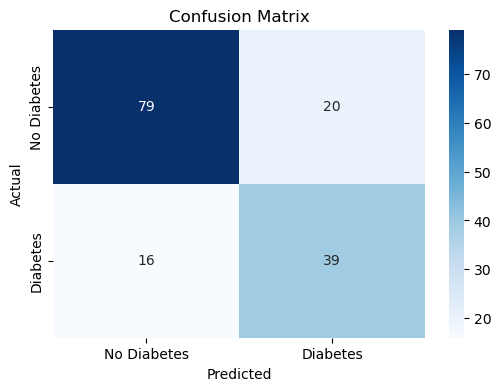

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
